<a href="https://www.kaggle.com/code/wonduk/analysis-on-pokemon-dataset-is-or-not-legendary?scriptVersionId=159639814" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: #f5c842; font-family: Times New Roman;color: black; padding: 14px; line-height: 1;border-radius:14px"> 🐱Pokemon Is or Not Legendary</div>

> <h1 style='font-family: Times New Roman;'> About Pokemon </h1>

<h3 style = 'font-family: Times New Roman'> 
Pokémon is a Japanese media franchise managed by The Pokémon Company, a company founded by Nintendo, Game Freak, and Creatures.<br><br>
The franchise was created by Satoshi Tajiri in 1996, and is centered on fictional creatures called "Pokémon".<br><br>
In Pokémon, humans, known as Pokémon Trainers, catch and train Pokémon to battle other Pokémon for sport.<br><br>
All media works within the franchise are set in the Pokémon universe. <br><br>
The English slogan for the franchise is "Gotta Catch ‘Em All!". (source: wikipedia)
</h3>

> <h1 style= 'font-family: Times New Roman;'> About Dataset</h1>

<br>
<h3 style = 'font-family: Times New Roman;'>
Pokemon Dataset consists of <b>23</b> columns, with <b>13</b> numeric and <b>10</b> categorical columns.<br>
<br>
<b><mark>'isLegendary'</mark></b> is a binary column, which is a <b><mark>target column</mark></b> of the dataset.</h3>

# <div style="text-align: center; background-color: #FFA533; color: black; font-family: Times New Roman; padding: 14px; line-height: 1;border-radius:14px"> 1. Import Necessary libraries</div>

In [1]:
# dataframe
import pandas as pd
import numpy as np

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# styling
%matplotlib inline
plt.style.use('default')
sns.set_theme(style="white")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)

# modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.svm import SVC

color_scheme = px.colors.qualitative.T10

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
pokemon_data = pd.read_csv("../input/pokemon/pokemon_alopez247.csv")
pokemon = pd.DataFrame(pokemon_data)
pokemon.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


(721, 23)


Text(0.5, 1.0, 'Distribution of Missing values')

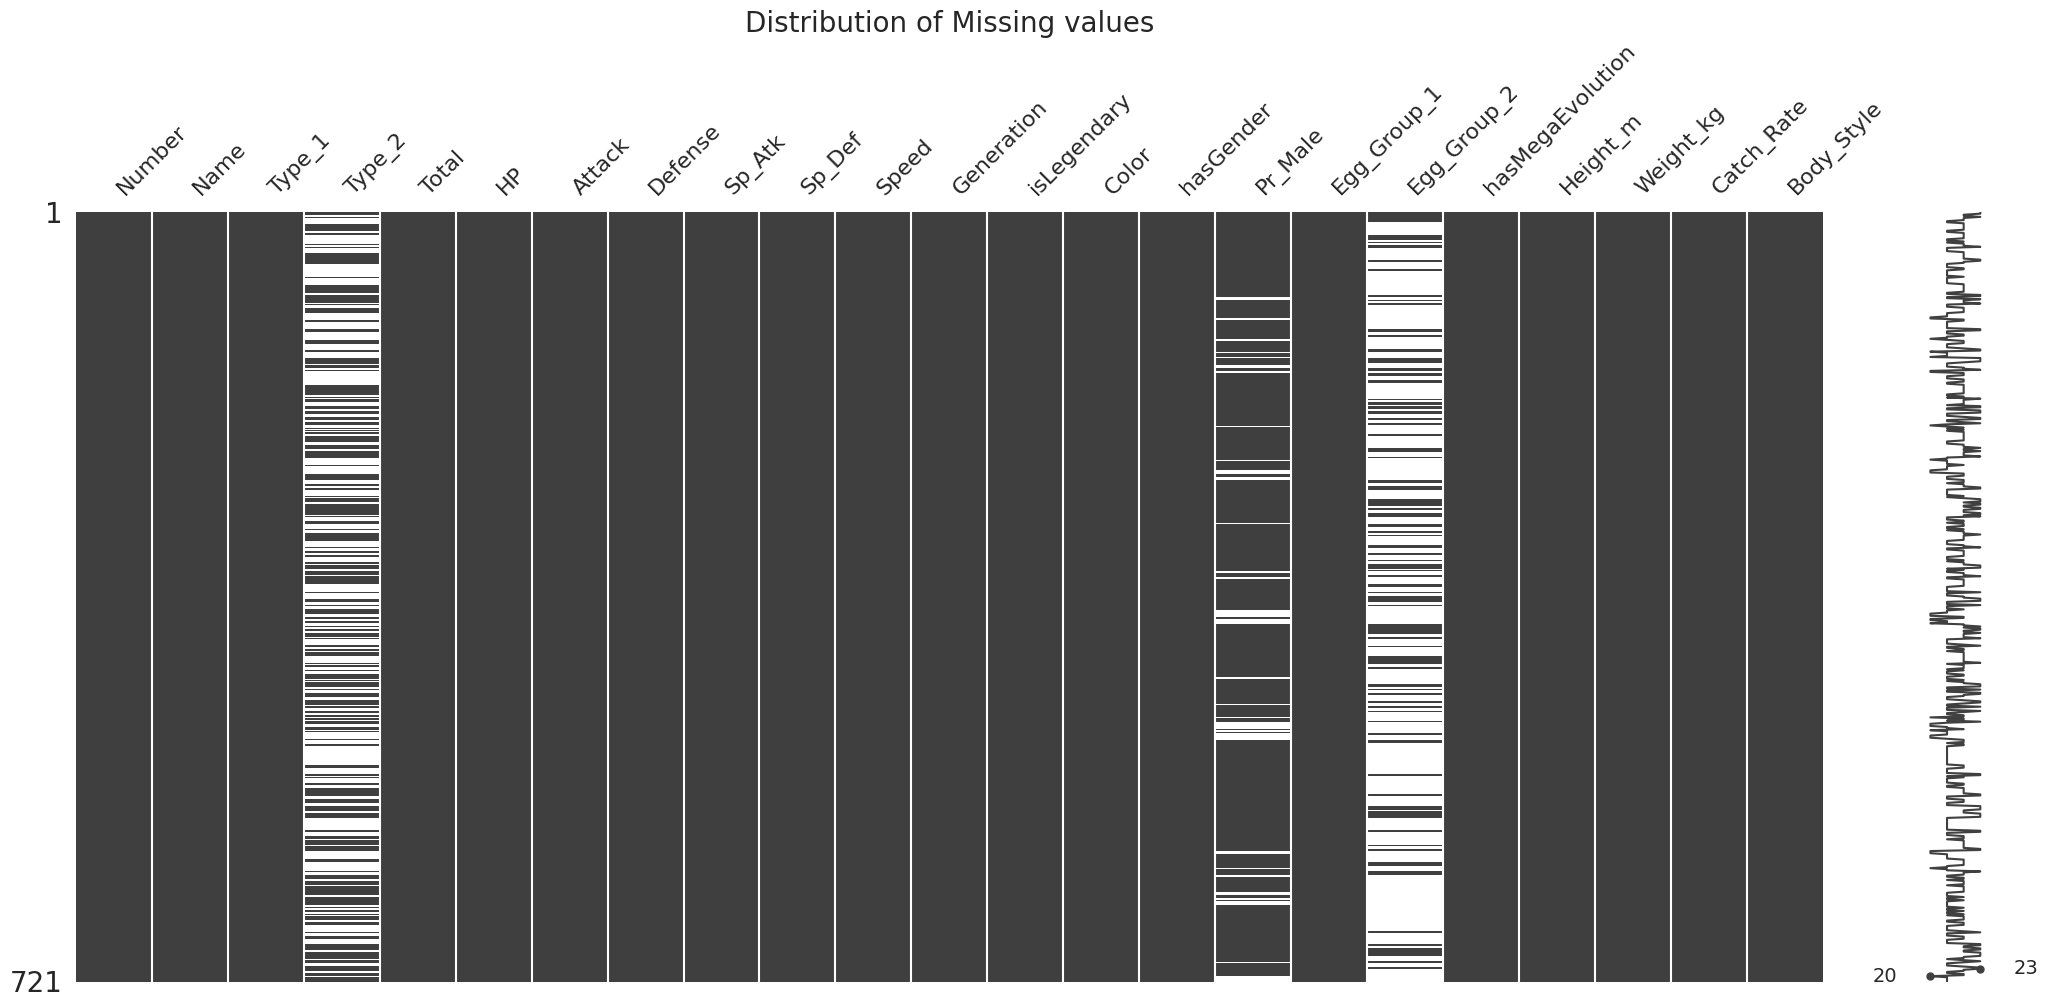

In [3]:
# here i used missingno matrix to see the distribution of null values columns
print(pokemon.shape)
msno.matrix(pokemon)
plt.title('Distribution of Missing values',fontsize = 20)

<b> From above, we can notice that columns 'Type_2' and 'Egg_Group_2' almost consist of null values, so i'll drop these two columns:</b>

Text(0.5, 1.0, 'After two columns removed')

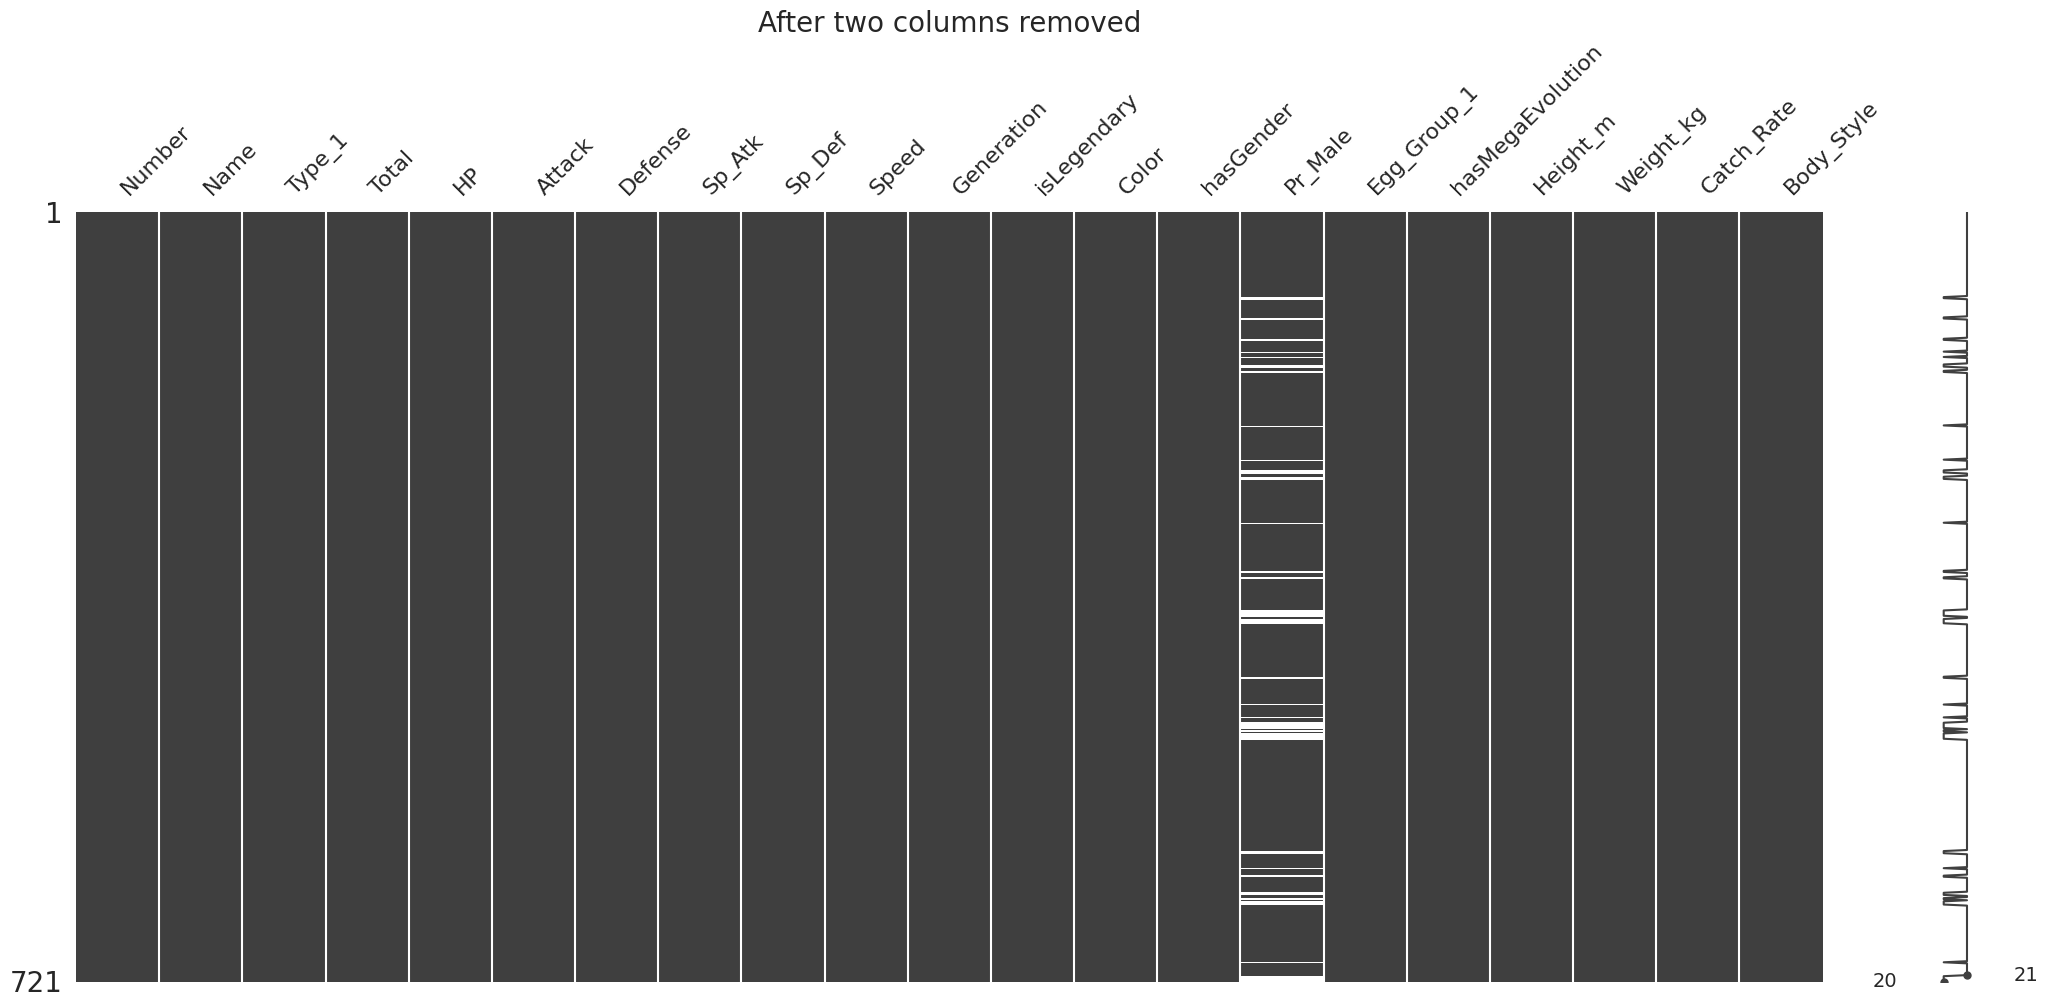

In [4]:
pokemon.drop(['Type_2','Egg_Group_2'],axis=1,inplace=True)
msno.matrix(pokemon)
plt.title('After two columns removed',fontsize = 20)

# <div style="text-align: center; background-color: #FFA533;font-family: Times New Roman; color: black; padding: 14px; line-height: 1;border-radius:14px">2. Univariate Analysis</div>

<b> In this section, we'll explore each columns in dataset, to get valuable insights.</b>

## <div style=" background-color: #FF9333; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">2.1. Type1</div>

<b> Type1 refers to primary type of pokemon, distribution shown as  below: </b>

In [5]:
type1 = pokemon['Type_1'].value_counts()
fig = px.bar(x=type1.index, y=type1.values, color = type1.index, 
             color_discrete_sequence=color_scheme,text = type1.values, title='Type1')

lst = [0,1,2]
for idx in lst:
    fig.data[idx].marker.line.width = 3
    fig.data[idx].marker.line.color='black'
    
fig.update_layout(
    xaxis_title="Type 1 ",
    yaxis_title="count",
    template = 'simple_white')
fig.show()

From above, Type_1 has some correlate values(ex. <b style='color:blue'>water</b> with <b style = 'color: blue'>ice</b>),and they'll be combined in feature engineering section.<br>
Also, we can notice that <u>Water, Normal, Grass</u> are top 3 most frequent types in the pokemon world.


## <div style=" background-color: #FF9333; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">2.2. Egg_Group_1</div>

<b> Egg Group 1 refers to Egg Group of the Pokémon</b>:

In [6]:
egg1 = pokemon['Egg_Group_1'].value_counts()
water = [2,-3,-4]

fig = px.bar(x=egg1.index, y=egg1.values, color=egg1.index, text=egg1.values,
             color_discrete_sequence=color_scheme, title='Egg Group 1')
print(lst)
for idx in lst:
    fig.data[idx].marker.line.width = 3
    fig.data[idx].marker.line.color='black'

fig.update_layout(
    xaxis_title="Egg Group 1",
    yaxis_title="count",
    template = 'simple_white')

fig.show()

[0, 1, 2]


<b>We can see that there're three <u style = 'color:blue'>Water</u> columns above, they'll be combined in feature engineering section</b>.

Additionally, <u>Field, Monster and Water</u> are top 3 frequent Egg Groups.

## <div style=" background-color: #FF9333; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">2.3. Pr_Male</div>

<cite> Pr_Male:  In case the Pokémon has Gender, the probability of its being male. The probability of being female is, of course, 1 minus this value</cite>.

<b>From missingno graph above, easily seen that 'Pr_Male' has null values</b>.

Text(0.5, 1.0, 'Pr_Male line plot')

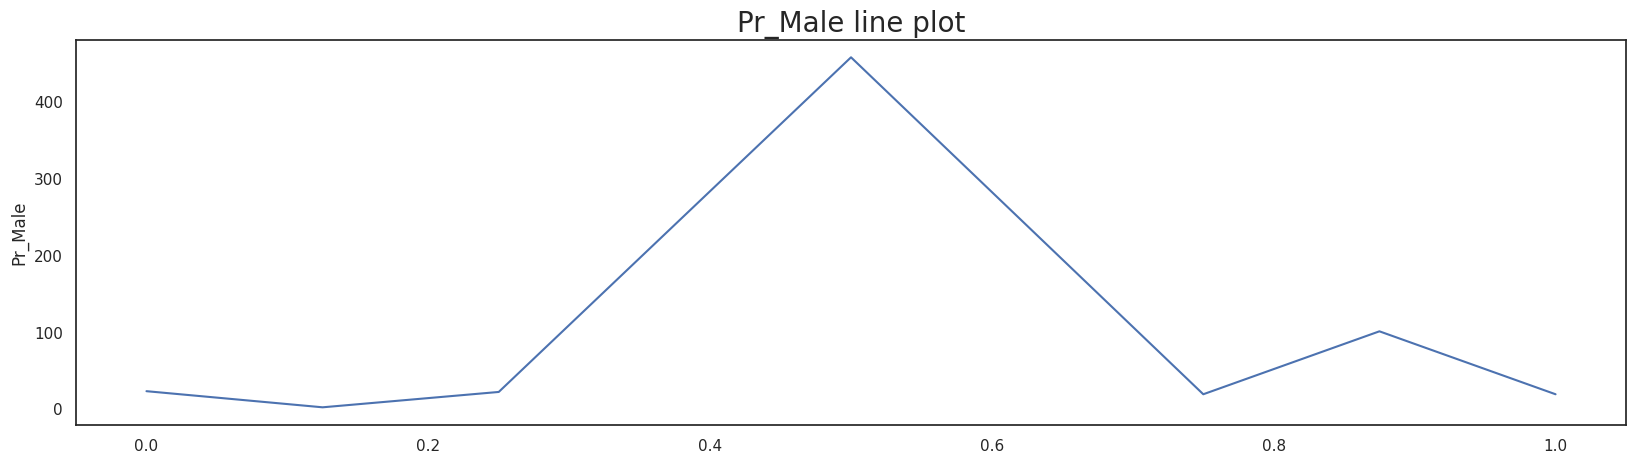

In [7]:
plt.figure(figsize=(20,5))
before = pokemon['Pr_Male'].value_counts()
sns.lineplot(data = pokemon['Pr_Male'].value_counts()).set_title('Pr_Male line plot',fontsize=20)

<b> fillin it with simpleimputer, strategy of <u>mean</u>, and compare before & after imputation</b>:

Text(0.5, 1.0, 'compare before & after imputation')

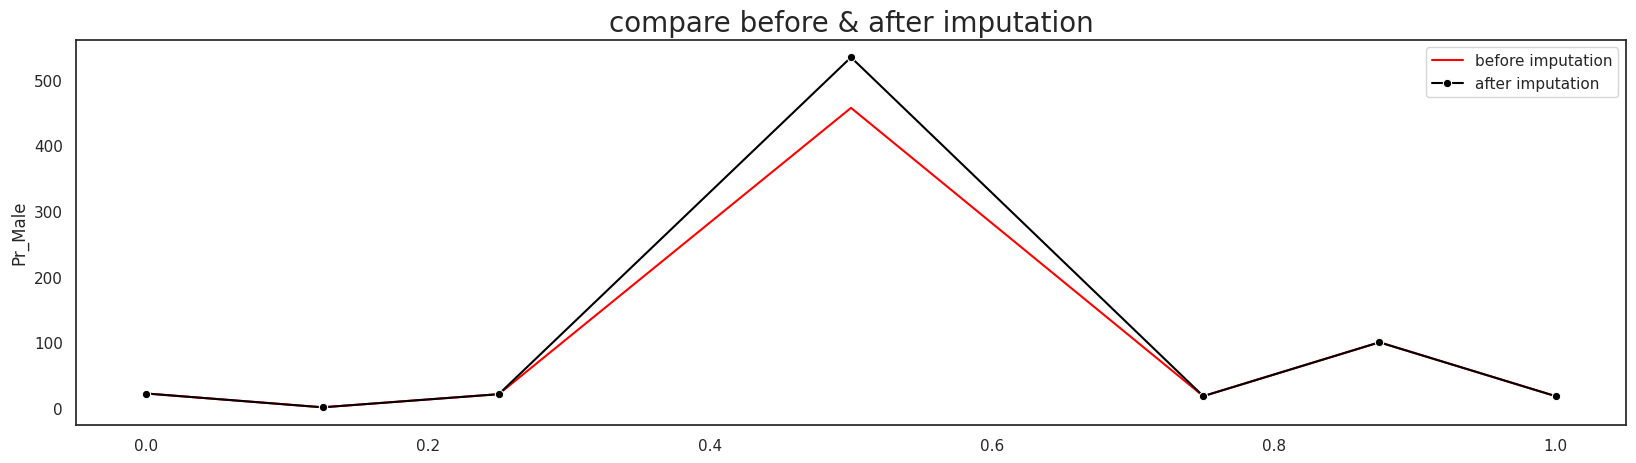

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(pokemon[['Pr_Male']])
pokemon['Pr_Male'] = imputer.transform(pokemon[['Pr_Male']])
after = pokemon['Pr_Male'].value_counts()
sns.set_theme(style="white")
plt.figure(figsize = (20,5))
sns.lineplot(data = before, linestyle='-',color='red', label='before imputation')
sns.lineplot(data = after, color = 'black', marker="o", label='after imputation')

plt.title('compare before & after imputation',fontsize=20)

Imputed successfully

### <div style=" background-color: #FF9333; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">2.4. Body_Style</div>

<cite>Body_Style: Body Style of the Pokémon according to the Pokédex</cite>.

In [9]:
body_style = pokemon['Body_Style'].value_counts()
fig = px.bar(y=body_style.values, 
             x=body_style.index, 
             color = body_style.index,
             color_discrete_sequence=color_scheme,
             text=body_style.values,
             title= 'Body Style')

for idx in lst:
    fig.data[idx].marker.line.width = 3
    fig.data[idx].marker.line.color='black'

fig.update_layout(
    xaxis_title="Body Style",
    yaxis_title="count",
    template = 'simple_white')

fig.show()

<b>Graph above indicates that type of <u>'bipedal_tailed' and "quadruped'</u> are the most common body style in the pokemon world</b>.

## <div style=" background-color: #FF9333; color: white; font-family: Times New Roman;padding: 10px; line-height: 1;border-radius:8px">2.5. Color</div>

In [10]:
color = pokemon['Color'].value_counts()

fig = px.pie(values=color.values, 
             names=color.index, 
             color_discrete_sequence=color_scheme,
             title= 'Color of pokemon')
fig.update_traces(textinfo='label+percent', textfont_size=13,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 0.5
fig.data[0].marker.line.color='gray'
fig.show()

Top 3 color of pokemon consist of <b style='color:blue'>Blue</b>, <b style='color:brown'>Brown</b> and <b style='color:green'>Green</b>.

## <div style=" background-color: #FF9333; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">2.6. Box Plot of HP, Attack, Defense</div>

[Text(0.5, 1.0, 'Defense')]

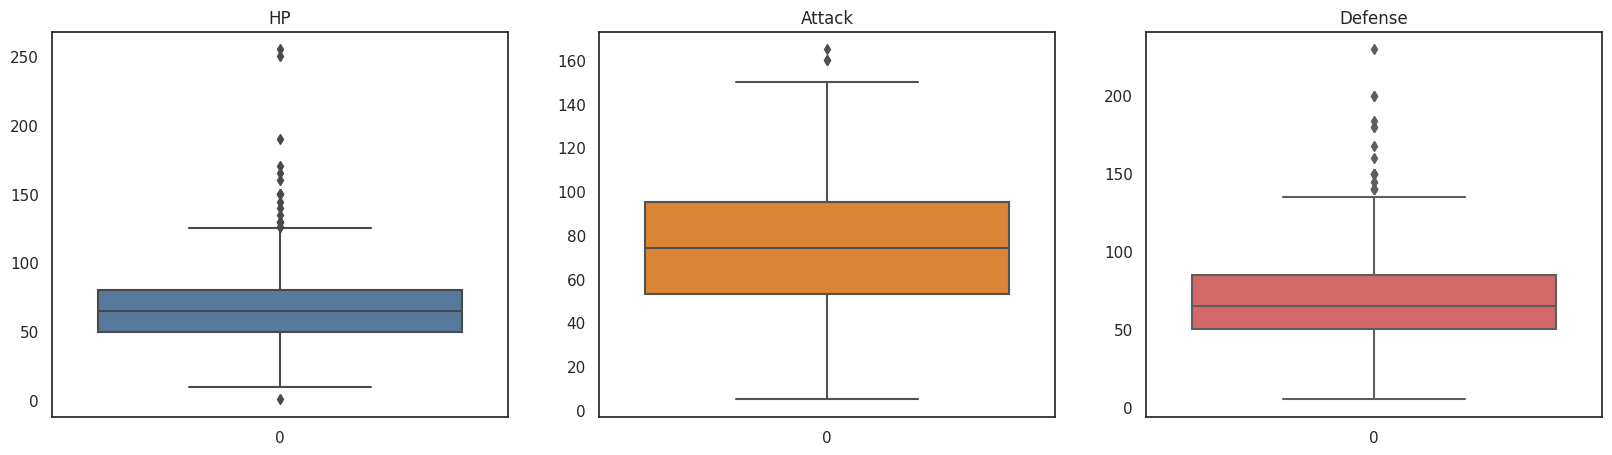

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20,5)
sns.boxplot(data=pokemon.HP,ax=ax1,color=color_scheme[0]).set(title='HP')
sns.boxplot(data=pokemon.Attack,ax=ax2,color=color_scheme[1]).set(title='Attack')
sns.boxplot(data=pokemon.Defense,ax=ax3,color=color_scheme[2]).set(title='Defense')

<b>We can observe the outliers of HP, Attack and Defense</b>.

## <div style=" background-color: #FF9333; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">2.7. Height, Weight_kg</div>

<cite> Height, Weight of pokemon</cite>:

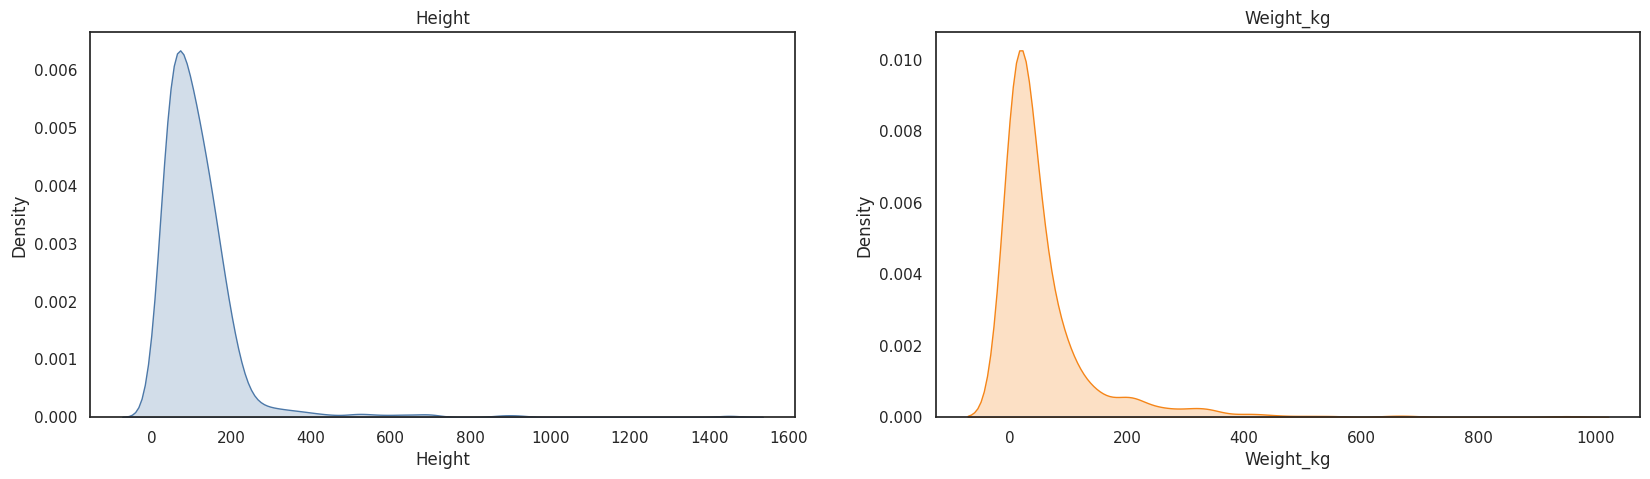

In [12]:
fig, ((ax1),(ax2)) = plt.subplots(ncols=2,nrows=1)
fig.set_size_inches(20,5)

pokemon['Height'] = pokemon['Height_m']*100
# plt.figure(figsize=(20,5))
sns.kdeplot(pokemon['Height'],color=color_scheme[0],shade=True,label='height',ax=ax1).set_title('Height')
sns.kdeplot(pokemon['Weight_kg'],color = color_scheme[1], shade=True,label='weight',ax=ax2).set_title('Weight_kg')
fig.show()

<b>It is obvious that height mostly distributed between 0 and 200, and Weight is mostly distributed in 0 to 100</b>

## <div style=" background-color: #FF9333; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">2.8. Has Mega Evolution & Is Legendary</div>

<cite> Has Mega Evolution: Boolean that indicates whether the Pokémon is able to Mega-evolve or not</cite>.

In [13]:
hasmega = pokemon['hasMegaEvolution'].value_counts()
legend = pokemon['isLegendary'].value_counts()
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, specs =[[{"type": "pie"},{"type":"pie"}]])

fig.add_trace(go.Pie(values = hasmega.values,
                     labels = hasmega.index,
                     marker = dict(colors=color_scheme),
                     title = "Has Mega Evolution", titlefont = dict(size=17)),row=1,col=1)

fig.add_trace(go.Pie(values = legend.values,
                     labels = legend.index,
                     marker = dict(colors=color_scheme),
                     title = "Is or Not Legendary", titlefont = dict(size=17)),row=1,col=2)

fig.show()

<b> Most pokemon(for 93.6%) don't have mega evolution and not Legendary
</b>.

# <div style="text-align: center; background-color: #FFA533; color: black; font-family: Times New Roman; padding: 14px; line-height: 1;border-radius:14px"> 3. Analysis on lowest catch rate pokemon</div>

<b> We generally think that pokemon that has low catch rate are rare or special, therefore we'll explore 3 problems in this section</b> :

* First, Do <b>legendary pokemon</b> have lowest catch rate?
* Second, what <b>types</b> mostly consist of lowest catch rate pokemon?
* Third, <b>which colors</b> do lowest catch rate pokemon commonly have?

<b>Before answering 3 questions above, create new dataframe that only consists of lowest catch rate pokemon</b>:

In [14]:
print('top 3 lowest catch rate:', list(pokemon['Catch_Rate'].value_counts().index.sort_values()[:3]))

top 3 lowest catch rate: [3, 15, 25]


<b> Easily seen that 3 is the lowest catch rate in the dataset</b>.

In [15]:
rate_3 = pokemon[pokemon['Catch_Rate']==3].reset_index().drop('index',axis=1)
print('shape of new dataframe: ', rate_3.shape)
rate_3.head(5)

shape of new dataframe:  (50, 22)


,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Height
0,144,Articuno,Ice,580,90,85,100,95,125,85,1,True,Blue,False,0.5,Undiscovered,False,1.70,55.4,3,two_wings,170.0
1,145,Zapdos,Electric,580,90,90,85,125,90,100,1,True,Yellow,False,0.5,Undiscovered,False,1.60,52.6,3,two_wings,160.0
2,146,Moltres,Fire,580,90,100,90,125,85,90,1,True,Yellow,False,0.5,Undiscovered,False,2.01,60.0,3,two_wings,201.0
3,150,Mewtwo,Psychic,680,106,110,90,154,90,130,1,True,Purple,False,0.5,Undiscovered,True,2.01,122.0,3,bipedal_tailed,201.0
4,243,Raikou,Electric,580,90,85,75,115,100,115,2,True,Yellow,False,0.5,Undiscovered,False,1.91,178.0,3,quadruped,191.0


<b>Now we've created new dataframe with lowest catch rate, which has 50 rows</b>.

## <div style=" background-color: #FF9333; color: white; font-family: Times New Roman;padding: 10px; line-height: 1;border-radius:8px">3.1. Legendary pokemon with lowest catch rate</div>

<b>First, let's explore whether legendary pokemon has lowest catch rate</b>:

In [16]:
legend_rate = rate_3['isLegendary'].value_counts()
fig = px.bar(x=legend_rate.index, y=legend_rate.values, color = legend_rate.index, 
             color_discrete_sequence=px.colors.sequential.dense,text = legend_rate.values, title='Legendary pokemon with lowest catch rate')

fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color='black'
fig.data[1].marker.line.width = 3
fig.data[1].marker.line.color='blue'
fig.update_traces(width=0.3)

fig.update_layout(
    xaxis_title="Lowest Catch Rate",
    yaxis_title="count",
    template = 'simple_white')

fig.show()

<b> Truely, most legendary pokemon has lowest catch rate, consider that there's only 46 legendary pokemon in the dataset</b>.

## <div style=" background-color: #FF9333; color: white; font-family: Times New Roman;padding: 10px; line-height: 1;border-radius:8px">3.2. Types of lowest catch rate pokemon</div>

In [17]:
type_rate = rate_3['Type_1'].value_counts()

fig = go.Figure(data=[
    go.Bar(name='Category of lowest catch rate', x=type_rate.index, y=type_rate.values,text=type_rate.values,marker_color=color_scheme[0]),
    go.Bar(name='Original Category', x=type1.index, y=type1.values,text=type1.values,marker_color=color_scheme[1])
])
fig.update_layout(barmode='group', xaxis_tickangle=-45,title='Category of pokemon',
                  template = 'simple_white')

fig.show()

<b>Now, we got valuable insight:</b><br><br>
Top 3 categories of lowest catch rate pokemon are <b style='color:purple'>'Psychic'</b>, <b style = 'color: gray'>'Steel'</b>, <b style='color:red'>'Dragon'</b>,<br>

whereas top 3 categories of whole pokemon are <b style='color:blue'>'Water'</b>, 'Normal' and <b style='color:green'>'Grass'</b> as seen before.<br><br>
<b> Thus, lowest catch rate pokemon are <u>rare</u> as we generally think those categories are special</b>.

## <div style=" background-color: #FF9333; color: white;font-family: Times New Roman;padding: 10px; line-height: 1;border-radius:8px">3.3. colors of lowest catch rate pokemon</div>

<b>which color do lowest catch rate pokemon commonly have?</b>

In [18]:
color3 = rate_3['Color'].value_counts()

fig = go.Figure(data=[
    go.Bar(name='Original Category', x=color.index, y=color.values, text=color.values, marker_color=color_scheme[0]),
    go.Bar(name='Category of lowest catch rate', x=color3.index, y=color3.values,text=color3.values, marker_color = color_scheme[1]),
])
fig.update_layout(barmode='stack', xaxis_tickangle=-45,title='Color of pokemon', template = 'simple_white')

fig.show()

<b>From above, we can see that there's no obvious difference color distribution between original & lowest catch rate pokemon</b>.

# <div style="text-align: center; background-color: #FFA533; color: black; font-family: Times New Roman;padding: 14px; line-height: 1;border-radius:14px"> 4. Total Stats Anaylsis</div>

<cite>'Total' column in this dataset stands for Sum of all the base stats</cite> <br><br>

explore 2 parts in this section</b>:

* (1) Find out Top 2 highest total stats pokemon

* (2) Analysis on highest Top 2 higest total stats pokemon

In [19]:
total = pokemon.groupby('Total').max().reset_index()
total['isLegendary'].replace(1,'legend',inplace=True)
total.tail(2)

,Total,Number,Name,Type_1,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Height
181,680,717,Zekrom,Water,150,150,130,154,154,130,6,True,White,False,0.5,Undiscovered,True,7.01,683.0,45,two_wings,701.0
182,720,493,Arceus,Normal,120,120,120,120,120,120,4,True,Grey,False,0.5,Undiscovered,False,3.20,320.0,3,quadruped,320.0


## <div style=" background-color: #FF9333; color: white; font-family: Times New Roman;padding: 10px; line-height: 1;border-radius:8px">4.1. top 2 highest total stats pokemon</div>

<b> Explore top 2 pokemon that have highest total stats</b>:

In [20]:
fig = px.treemap(total[-2:], 
                 path=['isLegendary','Type_1','Name'],
                 values='Total',
                 title = 'top2 highest total stats pokemon',
                 color = 'Total',
                 color_continuous_scale=color_scheme,
                 width=1300, height=500)
fig.update_layout(margin = dict(t=50, l=100, r=100, b=100))
fig.show()

<b> Top 2 highest total stats pokemon consist of two types: <u style='color:blue'>Water_Ice</u> type & <u style='color:gray'>normal</u> type</b> and are legendary pokemon.

In [21]:
fig = px.bar(x = total[-2:]['Name'], y = total[-2:]['Total'], 
       color_discrete_sequence=color_scheme, color = total[-2:]['Name'], text = total[-2:]['Total'], title='Top 2 highest total stats pokemon')
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"
fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.update_traces(width=0.3)

fig.update_layout(
    xaxis_title="Total Stats",
    yaxis_title="count",
    template = 'simple_white')

fig.show()

<b> Arceus has higest total stats among all pokemon</b>:

## <div style=" background-color: #FF9333; color: white;font-family: Times New Roman; padding: 10px; line-height: 1;border-radius:8px">4.2. Anaylsis on Arceus & Zekrom</div>

<b>As 'Arceus' and 'Zekrom' are the top 2 highest stats in the pokemon world, compare stats scores of them.</b>

In [22]:
arceus = pokemon[pokemon['Name']=='Arceus']
zekrom = pokemon[pokemon['Name']=='Zekrom']

In [23]:
fig = go.Figure()
categories = ['HP', 'Attack', 'Defense', 'Speed']
fig.add_trace(go.Scatterpolar(
             r = (arceus[['HP','Attack','Defense','Speed']].values/sum(arceus[['HP','Attack','Defense','Speed']].values.tolist()[0])).tolist()[0],
             theta = categories,
             fill = 'toself',
             name = 'Arceus Stats'
             ))
fig.add_trace(go.Scatterpolar(
             r = (zekrom[['HP','Attack','Defense','Speed']].values/sum(zekrom[['HP','Attack','Defense','Speed']].values.tolist()[0])).tolist()[0],
             theta = categories,
             fill = 'toself',
             name = 'Zekrom Stats'
             ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      range=[0, 0.4]
    )),
  showlegend=True,
  title = 'Arceus vs Zekrom (Stats)',
  template = 'simple_white',
)

<b>Arceus has a balanced stats while Zekrom has high attach but relatively row Speed and HP stats.</b>

# <div style="text-align: center; background-color: #FFA533; color: white; font-family: Times New Roman; padding: 14px; line-height: 1;border-radius:14px">5. correlation matrix </div>

<AxesSubplot:>

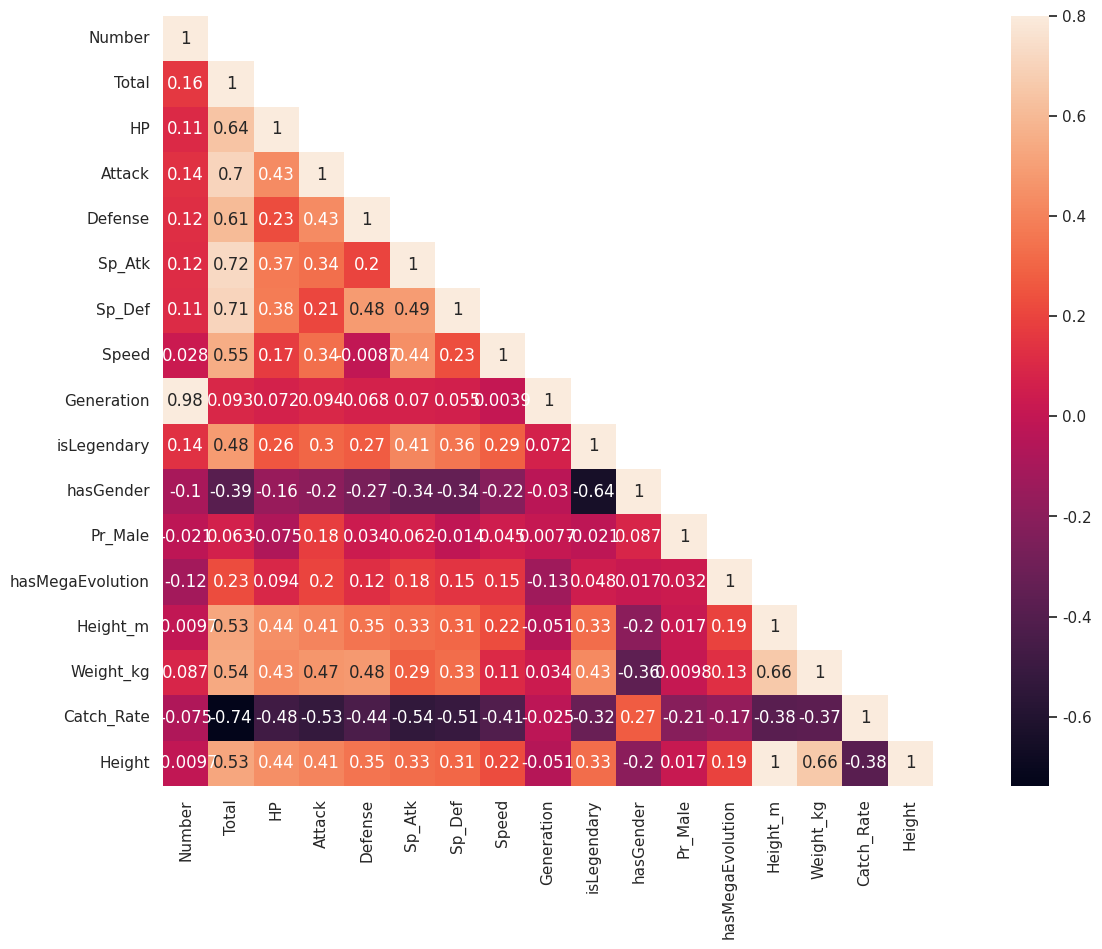

In [24]:
mask = np.array(pokemon.corr())
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots() 
fig.set_size_inches(20,10)
sns.heatmap(pokemon.corr(), mask = mask, vmax =.8, square = True, annot = True)

# <div style="text-align: center; background-color: #FFA533; color: white; font-family: Times New Roman;padding: 14px; line-height: 1;border-radius:14px">6. feature engineering</div>

<b> To begin with, convert isLegendary (target column) into 0 and 1</b>.

In [25]:
pokemon.replace(False,0,inplace=True)
pokemon.replace(True,1,inplace=True)
pokemon.head(3)

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Height
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,0,Green,1,0.875,Monster,0,0.71,6.9,45,quadruped,71.0
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,0,Green,1,0.875,Monster,0,0.99,13.0,45,quadruped,99.0
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,0,Green,1,0.875,Monster,1,2.01,100.0,45,quadruped,201.0


<b> As mentioned above, some features of Type1 and Egg Group1 will be replaced</b>.

In [26]:
# Type_1 and Egg_Group_1 
pokemon = pokemon.replace(['Water', 'Ice'],'Water_Ice')
pokemon = pokemon.replace(['Grass', 'Bug'],'Grass_Bug')
pokemon = pokemon.replace(['Ground', 'Rock'],'Ground_Rock')
pokemon = pokemon.replace(['Psychic','Dark','Ghost',"Fairy"],'Psychic_Dark_Ghost_Fairy')
pokemon = pokemon.replace(['Electric','Steel'],'ELectric_Steel')

pokemon = pokemon.replace(['Water_1','Water_2','Water_3'],'Water')

In [27]:
pokemon.head(2)

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Height
0,1,Bulbasaur,Grass_Bug,318,45,49,49,65,65,45,1,0,Green,1,0.875,Monster,0,0.71,6.9,45,quadruped,71.0
1,2,Ivysaur,Grass_Bug,405,60,62,63,80,80,60,1,0,Green,1,0.875,Monster,0,0.99,13.0,45,quadruped,99.0


In [28]:
body = dict(pokemon['Body_Style'].value_counts())

pokemon['Body_Style'] = pokemon['Body_Style'].map(body)

In [29]:
types_poke = pd.get_dummies(pokemon["Type_1"])
color_poke = pd.get_dummies(pokemon['Color'])

X = pd.concat([pokemon, types_poke],axis = 1)
X = pd.concat([X, color_poke], axis=1)

X.head()

,Number,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Height,Dragon,ELectric_Steel,Fighting,Fire,Flying,Grass_Bug,Ground_Rock,Normal,Poison,Psychic_Dark_Ghost_Fairy,Water_Ice,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,1,Bulbasaur,Grass_Bug,318,45,49,49,65,65,45,1,0,Green,1,0.875,Monster,0,0.71,6.9,45,135,71.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,Ivysaur,Grass_Bug,405,60,62,63,80,80,60,1,0,Green,1,0.875,Monster,0,0.99,13.0,45,135,99.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,Venusaur,Grass_Bug,525,80,82,83,100,100,80,1,0,Green,1,0.875,Monster,1,2.01,100.0,45,135,201.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,Charmander,Fire,309,39,52,43,60,50,65,1,0,Red,1,0.875,Monster,0,0.61,8.5,45,158,61.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,0,Red,1,0.875,Monster,0,1.09,19.0,45,158,109.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<b>and seperate dataframe into X, y for prediction</b>.

In [30]:
y = X['isLegendary']
X = X.drop(['Number','Type_1',"Name",'Color','Egg_Group_1','isLegendary'],axis=1)

# <div style="text-align: center; background-color: #FFA533; color: white;font-family: Times New Roman; padding: 14px; line-height: 1;border-radius:14px">7.Modeling</div>

## <div style=" background-color: #FF9333; color: white; font-family: Times New Roman; padding: 14px; line-height: 1;border-radius:8px"> 7.1. train test split</div>

In [31]:
train_X, test_X, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=116)

##  <div style=" background-color: #FF9333; color: white; font-family: Times New Roman; padding: 14px; line-height: 1;border-radius:8px">7.2. Modeling & Get accuracy & auc score of each model (Cross Validation) </div>

In [32]:
class modeling:
    def __init__(self, X_train, y_train_, X_test, y_test):
        self.FOLD = 5
        self.RANDOM_STATE = 116
        self.CLASSIFIERS = {
            "LogisiticRegression": LogisticRegression( random_state = self.RANDOM_STATE),
    "RandomForestClassifier": RandomForestClassifier(random_state = self.RANDOM_STATE),
    "LGBMClassifier": LGBMClassifier(random_state = self.RANDOM_STATE),
    "XGBClassifier": XGBClassifier(random_state = self.RANDOM_STATE),
    "CatBoostClassifier": CatBoostClassifier(random_state = self.RANDOM_STATE, logging_level='Silent')
        }
        self.FEATURES = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Generation', 'hasGender', 'Pr_Male', 'hasMegaEvolution', 'Height_m',
       'Weight_kg', 'Catch_Rate', 'Body_Style', 'Height', 'Dragon',
       'ELectric_Steel', 'Fighting', 'Fire', 'Flying', 'Grass_Bug',
       'Ground_Rock', 'Normal', 'Poison', 'Psychic_Dark_Ghost_Fairy',
       'Water_Ice', 'Black', 'Blue', 'Brown', 'Green', 'Grey', 'Pink',
       'Purple', 'Red', 'White', 'Yellow']
        self.X_train = X_train 
        self.y_train_ = y_train_
        self.X_test = X_test
        self.y_test = y_test
    
    def _scale(self, train_data, val_data):
        scaler = StandardScaler()       
        scaled_train = scaler.fit_transform(train_data[self.FEATURES])
        scaled_val = scaler.transform(val_data[self.FEATURES])
        train = train_data.copy()
        val = val_data.copy()   
        train[self.FEATURES] = scaled_train
        val[self.FEATURES] = scaled_val
        return train, val
    
    def classifiers_modeling(self):
        accuracy_list = []
        auc_list = []
        classifiers_name = list(self.CLASSIFIERS.keys())
        # 5 Fold
        fold = KFold(n_splits = self.FOLD, random_state = self.RANDOM_STATE, shuffle=True)
        for idx, classifier in enumerate(self.CLASSIFIERS.values()):        
            accuracy = 0
            auc = 0
            for fold_idx, (train_idx, val_idx) in enumerate(fold.split(self.X_train, self.y_train_)):
                x_train, x_val = self.X_train.iloc[train_idx], self.X_train.iloc[val_idx]
                y_train, y_val = self.y_train_.iloc[train_idx], self.y_train_.iloc[val_idx]
                x_train, x_val = self._scale(x_train, x_val)
                model = classifier.fit(x_train[self.FEATURES], y_train)
                val_preds = model.predict(x_val[self.FEATURES])
                accuracy += accuracy_score(y_val, val_preds) /self.FOLD
                auc += roc_auc_score(y_val, val_preds) / self.FOLD
            accuracy_list.append(round(accuracy,5))
            auc_list.append(round(auc,5))

            print('(',idx+1,')', classifiers_name[idx], 'cross validation (5 fold)')
            print('Mean Accurcy Score: ', round(accuracy, 5))
            print('Mean AUC Score: ', round(auc, 5))
#         print('Mean Accuracy Score: ', colored(round(accuracy,5)))
        return accuracy_list, auc_list

In [33]:
ML_model = modeling(train_X, train_y, test_X, test_y)
acc, auc = ML_model.classifiers_modeling()

( 1 ) LogisiticRegression cross validation (5 fold)
Mean Accurcy Score:  0.97418
Mean AUC Score:  0.86615
( 2 ) RandomForestClassifier cross validation (5 fold)
Mean Accurcy Score:  0.98014
Mean AUC Score:  0.92374
( 3 ) LGBMClassifier cross validation (5 fold)
Mean Accurcy Score:  0.98014
Mean AUC Score:  0.92374
[16:47:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:47:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:47:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:47:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:47:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
( 4 ) XGBClassifier cross validation (5 fold)
Mean Accurcy Score:  0.9841
Mean AUC Score:  0.96264
( 5 ) CatBoostClassifier cross validation (5 fold)
Mean Accurcy Score:  0.98212
Mean AUC Score:  0.94374


##  <div style=" background-color: #FF9333; color: white; font-family: Times New Roman; padding: 14px; line-height: 1;border-radius:8px">7.3. Model Score Comparison</div>

In [34]:
# fig = px.bar(x=list(accuracy_dict_sorted.keys()),
#        y=list(accuracy_dict_sorted.values()),
#        title = 'Model Accuracy Comparison',
#        color = list(accuracy_dict_sorted.keys()),
#        text = np.round(list(accuracy_dict_sorted.values()),3))
# fig.update_traces(width=0.4)
# fig.update_layout(
#     xaxis_title="Model",
#     yaxis_title="Accuracy")

fig = go.Figure(data=[
    go.Bar(name='Accuracy Score', 
           x=list(ML_model.CLASSIFIERS.keys()), y= acc,
           text=np.round(acc,3),marker_color=color_scheme[0]),
    go.Bar(name='AUC Score', 
           x=list(ML_model.CLASSIFIERS.keys()), y=auc,
           text=np.round(auc,3),marker_color=color_scheme[1])
])
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Accuracy",
    title = 'Model Comparison: Cross Validated Score',
    template = 'simple_white')

fig.update_traces(width=0.3)
fig.show()